
# 🚀 Optimizers in Deep Learning: Adam, AdamW & More

In this notebook, we:
- Compare different gradient descent optimizers.
- Explore their **definitions, equations, pros & cons**.
- Implement **AdamW from scratch** in PyTorch.
- Train a simple model to visualize the difference.

---


<h3 style="color:#00adb5; font-weight:800; letter-spacing:.3px; margin:0">Comparison of different Optimizers</h3>
<hr style="border:0; height:2px; margin:.75rem 0 1rem 0; background:linear-gradient(90deg,#00adb5, #ff7a59); border-radius:2px" />



| Algorithm                    | Definition / Idea                                                                                                   | Equation (update rules from article)                                                                                                                                                                                                                                                    | Pros                                                                                                                      | Cons                                                                                                      | Other Notes                                                                 |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------- |
| **Vanilla Gradient Descent** | Moves parameters in the negative direction of gradient scaled by learning rate.                                     | $\Delta = -\eta \cdot \nabla L(\theta)$ <br> $\theta \leftarrow \theta + \Delta$                                                                                                                                                                                                        | - Simple & intuitive <br> - Works well for convex problems                                                                | - Slow convergence <br> - Can get stuck in local minima / saddle points <br> - Sensitive to learning rate | Baseline method; most improvements build on it.                             |
| **Momentum**                 | Adds a velocity term (cumulative gradient) to accelerate movement in consistent directions and smooth oscillations. | (Form 1) <br> $\Delta = -\eta \cdot g + \text{decay} \cdot \Delta_{t-1}$ <br> $\theta \leftarrow \theta + \Delta$ <br><br> (Equivalent Form) <br> $s_t = g + \text{decay} \cdot s_{t-1}$ <br> $\Delta = -\eta \cdot s_t$                                                                | - Faster than vanilla GD <br> - Helps escape local minima & plateaus <br> - Reduces oscillations                          | - Requires tuning decay rate (0.8–0.9 typical) <br> - Too high decay → overshooting                       | Analogy: rolling ball with friction. Helps “power through” shallow valleys. |
| **AdaGrad**                  | Adapts learning rate per parameter using cumulative sum of squared gradients.                                       | $G_t = G_{t-1} + g^2$ <br> $\Delta = -\eta \cdot g / \sqrt{G_t}$ <br> $\theta \leftarrow \theta + \Delta$                                                                                                                                                                               | - Good for sparse features <br> - Escapes saddle points <br> - No need for manual per-feature learning rate               | - Learning rate decays aggressively (updates stall over time) <br> - Poor for long training               | Often used in NLP / sparse data.                                            |
| **RMSProp**                  | Fixes AdaGrad’s decay issue by using exponentially decayed average of squared gradients.                            | $G_t = \text{decay} \cdot G_{t-1} + (1-\text{decay}) \cdot g^2$ <br> $\Delta = -\eta \cdot g / \sqrt{G_t}$ <br> $\theta \leftarrow \theta + \Delta$                                                                                                                                     | - Avoids aggressive learning rate decay <br> - Faster convergence than AdaGrad <br> - Handles non-stationary problems     | - Requires tuning decay rate (e.g. 0.9–0.99) <br> - Sensitive to $\epsilon$                               | Popular for RNNs; more stable than AdaGrad.                                 |
| **Adam**                     | Combines Momentum (1st moment) + RMSProp (2nd moment) with bias correction.                                         | $m_t = \beta_1 m_{t-1} + (1-\beta_1) g$ <br> $v_t = \beta_2 v_{t-1} + (1-\beta_2) g^2$ <br> Bias-corrected: $\hat m_t = m_t/(1-\beta_1^t)$, $\hat v_t = v_t/(1-\beta_2^t)$ <br> $\Delta = -\eta \cdot \hat m_t / (\sqrt{\hat v_t} + \epsilon)$ <br> $\theta \leftarrow \theta + \Delta$ | - Combines speed (Momentum) + adaptivity (RMSProp) <br> - Often best default optimizer <br> - Works well in deep learning | - More memory overhead (stores $m, v$) <br> - Sometimes worse generalization than SGD                     | Default choice in many DL frameworks; β₁=0.9, β₂=0.999 typical.             |


<style>
/* Theming for tables */
.rendered_html table,
.jp-RenderedHTMLCommon table {
  border-collapse: separate;
  border-spacing: 0;
  width: 100%;
  background: var(--md-card, #fff);
  border: 1px solid #e3e7ef;
  border-radius: 10px;
  overflow: hidden;
  box-shadow: 0 2px 10px rgba(2, 12, 27, 0.05);
}

.rendered_html thead th,
.jp-RenderedHTMLCommon thead th {
  background: linear-gradient(90deg, var(--md-accent, #00adb5), #5dd5db);
  color: #ffffff;
  text-align: left;
  padding: 10px 12px;
  font-weight: 700;
  letter-spacing: .2px;
}

.rendered_html tbody td,
.jp-RenderedHTMLCommon tbody td {
  padding: 10px 12px;
  border-top: 1px solid #eef2f8;
  color: var(--md-fg, #222831);
}

/* Zebra striping */
.rendered_html tbody tr:nth-child(even),
.jp-RenderedHTMLCommon tbody tr:nth-child(even) {
  background: #f7f9fc;
}

/* Hover */
.rendered_html tbody tr:hover,
.jp-RenderedHTMLCommon tbody tr:hover {
  background: #eef7f8;
}

/* First/last cell rounding fix for separated borders */
.rendered_html tbody tr:first-child td,
.jp-RenderedHTMLCommon tbody tr:first-child td { border-top: none; }

/* Compact helper class */
.rendered_html table.compact td,
.jp-RenderedHTMLCommon table.compact td { padding: 6px 8px; }
</style>

<!-- Example (optional):
<table class="compact">
  <thead>
    <tr><th>Optimizer</th><th>Pros</th><th>Cons</th></tr>
  </thead>
  <tbody>
    <tr><td>Adam</td><td>Fast, adaptive</td><td>Weight decay distorted</td></tr>
    <tr><td>AdamW</td><td>Better generalization</td><td>Negligible extra cost</td></tr>
  </tbody>
</table>
-->



<h3 style="color:#00adb5; font-weight:800; letter-spacing:.3px; margin:0">Adam vs AdamW Optimizers</h3>
<hr style="border:0; height:2px; margin:.75rem 0 1rem 0; background:linear-gradient(90deg,#00adb5, #ff7a59); border-radius:2px" />



🔑 **Core Difference**

Both are adaptive optimizers based on Adam. The key distinction lies in how weight decay (L2 regularization) is applied:

**Adam (original):**

- Weight decay is implemented as L2 regularization inside the gradient update.
- This couples weight decay with the adaptive learning rate scaling.
- **Effect:** The regularization is “distorted” by Adam’s adaptive update, reducing effectiveness.

**AdamW (Decoupled Weight Decay):**

- Weight decay is applied directly to the weights, separate from gradient updates.
- This decoupling makes weight decay behave as intended: consistent shrinkage of weights, independent of adaptive scaling.
- **Effect:** Much more stable and effective regularization.

<br>

🧮 **Equations**

**Adam Optimizer**

Loss function with L2 regularization (weight decay):

$$
L = L_{\text{error}} + \lambda \|\theta\|^2
$$

Gradient:

$$
g_t = \nabla_\theta L + \lambda \theta
$$

Momentum (first moment) update:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$$

Second moment (RMS) update:

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

Bias-corrected moments:

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

Parameter update:

$$
\Delta \theta_t = - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}, \quad
\theta_{t+1} = \theta_t + \Delta \theta_t
$$

✅ Weight decay is included inside the gradient computation as L2 regularization.



**AdamW Optimizer**

Loss function without explicit weight decay:

$$
L = L_{\text{error}}
$$

Gradient:

$$
g_t = \nabla_\theta L
$$

Momentum (first moment) update:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$$

Second moment (RMS) update:

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

Bias-corrected moments:

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

Parameter update with decoupled weight decay:

$$
\Delta \theta_t = - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} - \eta \lambda \theta_t, \quad
\theta_{t+1} = \theta_t + \Delta \theta_t
$$

✅ Weight decay is applied directly to the parameters instead of being added to the gradient.

<br>

**Key Takeaways**

Weight Decay Placement

- **Adam:** Weight decay is applied via L2 regularization in the gradient.  
- **AdamW:** Weight decay is decoupled from the gradient; applied directly to the weights.

Impact on Training

- **Adam:** Coupling L2 with the adaptive learning rate can lead to suboptimal regularization.  
- **AdamW:** Decoupled weight decay allows better regularization and often improves generalization.

Implementation Differences

- **Adam:** Uses gradient + λθ in both momentum and squared term.  
- **AdamW:** Uses gradient only in momentum and squared term, and subtracts ηλθ separately.

<br>

**Comparison Table**

| Feature                    | Adam                                | AdamW                              |
|-----------------------------|------------------------------------|-----------------------------------|
| **Loss function**           | $L_{\text{error}} + \lambda \|\theta\|^2$ | $L_{\text{error}}$               |
| **Gradient**                | $g_t = \nabla_\theta L + \lambda \theta$ | $g_t = \nabla_\theta L$          |
| **Momentum update**         | $m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$ | $m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$ |
| **Second moment update**    | $v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$ | $v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$ |
| **Bias-corrected updates**  | $\hat{m}_t = \frac{m_t}{1-\beta_1^t}, \ \hat{v}_t = \frac{v_t}{1-\beta_2^t}$ | Same as Adam |
| **Parameter update**        | $\theta_{t+1} = \theta_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$ | $\theta_{t+1} = \theta_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} - \eta \lambda \theta_t$ |
| **Weight decay type**       | Coupled with gradient (L2 regularization) | Decoupled from gradient           |
| **Generalization behavior** | Can be suboptimal due to coupling   | Typically better due to decoupling |


<h3 style="color:#00adb5; font-weight:800; letter-spacing:.3px; margin:0">Custom Implementation of AdamW using PyTorch</h3>
<hr style="border:0; height:2px; margin:.75rem 0 1rem 0; background:linear-gradient(90deg,#00adb5, #ff7a59); border-radius:2px" />



In [8]:
import torch

class AdamW_FromScratchFull:
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0.01):
        self.params = list(params)
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.weight_decay = weight_decay
        self.t = 0

        self.state = {}
        for param in self.params:
            self.state[param] = {
                "m": torch.zeros_like(param.data),
                "v": torch.zeros_like(param.data),
            }

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

    def step(self):
        
        self.t += 1
        for param in self.params:
            if param.grad is None:
                continue

            grad = param.grad

            state = self.state[param]
            m, v = state["m"], state["v"]

            m.mul_(self.beta1).add_(grad,alpha=1-self.beta1)
            v.mul_(self.beta2).addcmul_(grad,grad,value=1-self.beta2)

            m_hat = m.div(1-self.beta1**self.t)
            v_hat = v.div(1-self.beta2**self.t)

            update = m_hat / (torch.sqrt(v_hat) + self.eps) + self.weight_decay * param.data
            param.data.sub_(self.lr * update)

    def state_dict(self):
        return {
            "state": {id(p):{"m": self.state[p]["m"].clone(), "v": self.state[p]["v"].clone()} for p in self.params},
            "t": self.t,
            "betas": (self.beta1, self.beta2),
            "eps": self.eps,
            "weight_decay": self.weight_decay,
            "lr": self.lr,
        }
    def load_state_dict(self, state_dict):
        """Loads optimizer state."""
        self.t = state_dict['t']
        self.lr = state_dict['lr']
        self.beta1, self.beta2 = state_dict['betas']
        self.eps = state_dict['eps']
        self.weight_decay = state_dict['weight_decay']
        
        for p in self.params:
            s = state_dict['state'][id(p)]
            self.state[p]['m'] = s['m'].clone()
            self.state[p]['v'] = s['v'].clone()

x = torch.tensor([1.0,2.0,3.0])
y = torch.tensor([2.0,4.0,6.0])

w = torch.nn.Parameter(torch.zeros(3))

optimizer = AdamW_FromScratchFull([w], lr=0.1, weight_decay=0.01)

for step in range(20):
    optimizer.zero_grad()
    y_pred = w * x
    loss = ((y_pred - y) ** 2).mean()

    loss.backward()
    optimizer.step()

    print(f"Step {step+1}: w = {w.data}, loss = {loss.item():.6f}") 
            

Step 1: w = tensor([0.1000, 0.1000, 0.1000]), loss = 18.666666
Step 2: w = tensor([0.1997, 0.1997, 0.1997]), loss = 16.846666
Step 3: w = tensor([0.2991, 0.2991, 0.2991]), loss = 15.124476
Step 4: w = tensor([0.3979, 0.3979, 0.3979]), loss = 13.501313
Step 5: w = tensor([0.4961, 0.4961, 0.4961]), loss = 11.978081
Step 6: w = tensor([0.5934, 0.5934, 0.5934]), loss = 10.555347
Step 7: w = tensor([0.6897, 0.6897, 0.6897]), loss = 9.233298
Step 8: w = tensor([0.7849, 0.7849, 0.7849]), loss = 8.011708
Step 9: w = tensor([0.8788, 0.8788, 0.8788]), loss = 6.889900
Step 10: w = tensor([0.9711, 0.9711, 0.9711]), loss = 5.866721
Step 11: w = tensor([1.0616, 1.0616, 1.0616]), loss = 4.940509
Step 12: w = tensor([1.1503, 1.1503, 1.1503]), loss = 4.109072
Step 13: w = tensor([1.2367, 1.2367, 1.2367]), loss = 3.369673
Step 14: w = tensor([1.3207, 1.3207, 1.3207]), loss = 2.719020
Step 15: w = tensor([1.4021, 1.4021, 1.4021]), loss = 2.153271
Step 16: w = tensor([1.4807, 1.4807, 1.4807]), loss = 1.66

<h3 style="color:#00adb5; font-weight:800; letter-spacing:.3px; margin:0">Training a Simple NN Model to Test Custom AdamW</h3>
<hr style="border:0; height:2px; margin:.75rem 0 1rem 0; background:linear-gradient(90deg,#00adb5, #ff7a59); border-radius:2px" />



In [ ]:
# ==========================
# Dummy Dataset (y = 2x + 3 + noise)
# ==========================
torch.manual_seed(42)
X = torch.linspace(-5,5,100).unsqueeze(1) 
y = 2*X +3 + 0.5 * torch.randn_like(X)

# ==========================
# Simple 2-Layer MLP
# ==========================

import torch.nn as nn
import torch.nn.functional as F

class SimpleMLP(nn.Module) :
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,16)
        self.fc2 = nn.Linear(16,1)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = SimpleMLP()

optimizer = AdamW_FromScratchFull(model.parameters(), lr=0.01, weight_decay=0.01)
loss_fn = nn.MSELoss()

for epoch in range(1,51):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch:02d}, Loss = {loss.item():.6f}")


Epoch 10, Loss = 27.908432
Epoch 20, Loss = 18.990736
Epoch 30, Loss = 11.056252
Epoch 40, Loss = 4.653586
Epoch 50, Loss = 1.021799


<h3 style="color:#00adb5; font-weight:800; letter-spacing:.3px; margin:0">Predictions vs Ground Truth Plot</h3>
<hr style="border:0; height:2px; margin:.75rem 0 1rem 0; background:linear-gradient(90deg,#00adb5, #ff7a59); border-radius:2px" />



Fontconfig warning: ignoring UTF-8: not a valid region tag


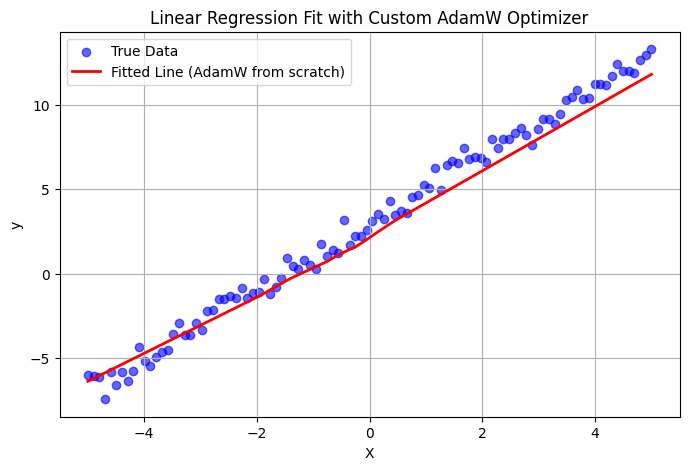

In [7]:
import matplotlib.pyplot as plt
import torch

# After training loop, add this:

# Switch model to eval mode
model.eval()
with torch.no_grad():
    y_pred = model(X)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X.numpy(), y.numpy(), label="True Data", color="blue", alpha=0.6)
plt.plot(X.numpy(), y_pred.numpy(), label="Fitted Line (AdamW from scratch)", color="red", linewidth=2)
plt.title("Linear Regression Fit with Custom AdamW Optimizer")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
